In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset


# Read dataset (adjust filename as necessary)
df = pd.read_csv('cve.csv')

# Inspect the data
df.head()


,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,CVE-2019-16548,2019-11-21 15:15:00,2019-11-21 15:15:00,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-2019-16547,2019-11-21 15:15:00,2019-11-21 15:15:00,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16546,2019-11-21 15:15:00,2019-11-21 15:15:00,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2013-2092,2019-11-20 21:22:00,2019-11-20 21:15:00,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2091,2019-11-20 20:15:00,2019-11-20 20:15:00,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop missing values if any
df.dropna(subset=['summary', 'cvss'], inplace=True)

# Split data into features (X) and target (y)
X = df['summary']
y = df['cvss']

# TF-IDF Vectorization (Convert text to numerical data)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_vectorized = vectorizer.fit_transform(X).toarray()


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Mean Squared Error: 1.2181799276443803
R-squared Score: 0.6926715633366755


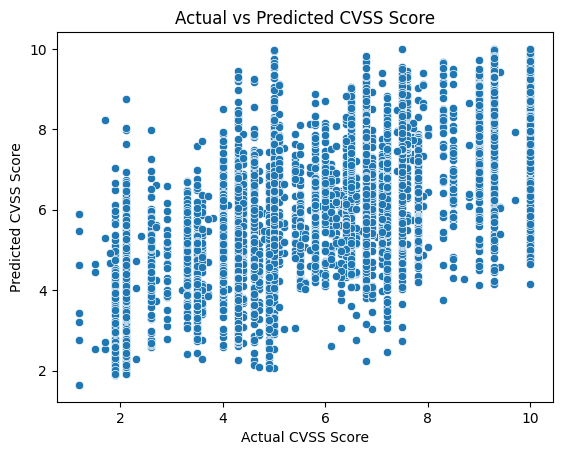

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualize predictions vs actual scores
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CVSS Score")
plt.ylabel("Predicted CVSS Score")
plt.title("Actual vs Predicted CVSS Score")
plt.show()


In [ ]:
# Assuming `X_train` is your training data and `model` is the trained Random Forest Regressor

# Step 1: Get the predictions for the training data
predicted_cvss_scores = model.predict(X_train)

# Step 2: Calculate the range for each predicted score and ensure it is between 0 and 10
ranges = [(max(0, pred - 1.5), min(10, pred + 1.5)) for pred in predicted_cvss_scores]

# Step 3: Print the predicted score along with its range (ensuring range is within [0, 10])
for i, pred in enumerate(predicted_cvss_scores):
    lower_bound, upper_bound = ranges[i]
    print(f"Predicted CVSS score: {pred:.2f}, Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
